 <p style="padding:10px;background-color:purple;margin:200;color:black;font-family:calibri;font-size:200%;text-align:center;border-radius: 1500px 500px;overflow:hidden;font-weight:8000">Federated learning - Diabetes detection 
 </p>

# <p style="padding:20px;background-color:#012e27;margin:0;color:white;font-family:calibri;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">🧪 Step 1 | exploring the data</p>



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary modules from scikit-learn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [30]:

# Load the dataset
file_path = "diabetes_dataset.csv" 
df = pd.read_csv(file_path)

In [31]:
df.head()

,Age,Gender,Ethnicity,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Smoking_Status,...,Insulin_Resistance,Heart_Disease_History,Physical_Activity_Level,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Stress_Level,Medication_Use,Diabetes_Diagnosis
0,69,Female,Other,39557,38.2,94.6,252.9,3.3,4,Never,...,5.1,0,Low,3,4,3641,8.7,Low,0,1
1,32,Male,Black,90663,33.6,167.0,282.6,4.6,7,Never,...,1.7,1,Moderate,8,0,3361,8.0,Low,1,0
2,89,Male,White,116180,39.4,100.6,106.8,6.1,5,Former,...,4.9,1,Low,9,8,2397,8.8,High,1,0
3,78,Male,Other,73059,40.6,111.1,169.7,7.4,9,Never,...,9.8,0,High,7,5,2491,6.4,Low,1,1
4,38,Female,White,35389,29.7,143.3,296.5,2.6,6,Never,...,1.7,1,Moderate,0,7,1325,6.6,High,1,0


In [32]:
df.describe()

,Age,Income,BMI,Blood_Pressure,Cholesterol,Exercise_Hours_Per_Week,Alcohol_Consumption_Per_Week,Family_History_Diabetes,Glucose_Level,HbA1c,Insulin_Resistance,Heart_Disease_History,Fast_Food_Intake_Per_Week,Processed_Food_Intake_Per_Week,Daily_Caloric_Intake,Sleep_Hours_Per_Night,Medication_Use,Diabetes_Diagnosis
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,53.398700,85176.555140,31.818748,135.080956,200.185024,4.991036,7.004840,0.501920,135.015394,6.999164,5.510322,0.497880,4.508980,4.488260,2604.612420,7.000978,0.500880,0.502080
std,20.799006,37574.185279,7.637138,26.039637,57.737684,2.882748,4.324922,0.500001,37.458042,1.727541,2.594047,0.500001,2.863153,2.873003,807.340375,1.736496,0.500004,0.500001
min,18.000000,20000.000000,18.500000,90.000000,100.000000,0.000000,0.000000,0.000000,70.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1200.000000,4.000000,0.000000,0.000000
25%,35.000000,52551.000000,25.200000,112.400000,150.400000,2.500000,3.000000,0.000000,102.500000,5.500000,3.300000,0.000000,2.000000,2.000000,1911.000000,5.500000,0.000000,0.000000
50%,53.000000,85355.500000,31.800000,135.200000,200.300000,5.000000,7.000000,1.000000,135.300000,7.000000,5.500000,0.000000,5.000000,4.000000,2604.000000,7.000000,1.000000,1.000000
75%,71.000000,117782.750000,38.400000,157.600000,250.300000,7.500000,11.000000,1.000000,167.300000,8.500000,7.700000,1.000000,7.000000,7.000000,3298.000000,8.500000,1.000000,1.000000
max,89.000000,149997.000000,45.000000,180.000000,300.000000,10.000000,14.000000,1.000000,200.000000,10.000000,10.000000,1.000000,9.000000,9.000000,3999.000000,10.000000,1.000000,1.000000


In [33]:
print(df.columns)

Index(['Age', 'Gender', 'Ethnicity', 'Income', 'BMI', 'Blood_Pressure',
       'Cholesterol', 'Exercise_Hours_Per_Week',
       'Alcohol_Consumption_Per_Week', 'Smoking_Status',
       'Family_History_Diabetes', 'Glucose_Level', 'HbA1c',
       'Insulin_Resistance', 'Heart_Disease_History',
       'Physical_Activity_Level', 'Fast_Food_Intake_Per_Week',
       'Processed_Food_Intake_Per_Week', 'Daily_Caloric_Intake',
       'Sleep_Hours_Per_Night', 'Stress_Level', 'Medication_Use',
       'Diabetes_Diagnosis'],
      dtype='object')


C:\Users\admin\AppData\Local\Temp\ipykernel_20696\3601642758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes_Diagnosis', data=df, palette="coolwarm")


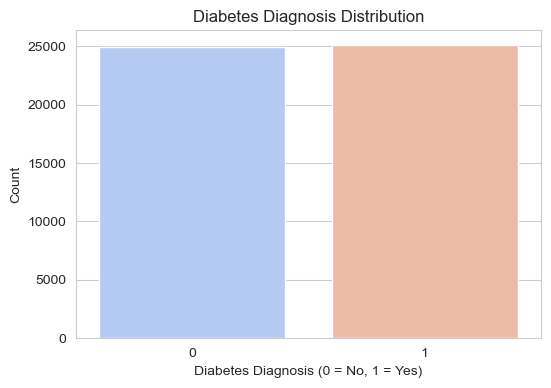

In [34]:
# Distribution of Diabetes Diagnosis
plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_Diagnosis', data=df, palette="coolwarm")
plt.title("Diabetes Diagnosis Distribution")
plt.xlabel("Diabetes Diagnosis (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

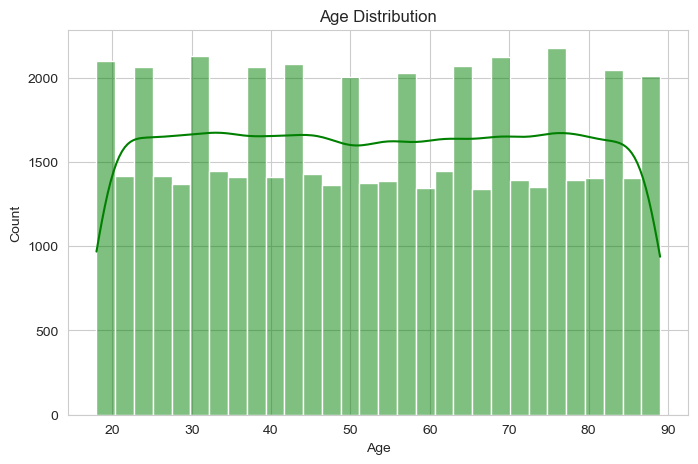

In [35]:
# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="green")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

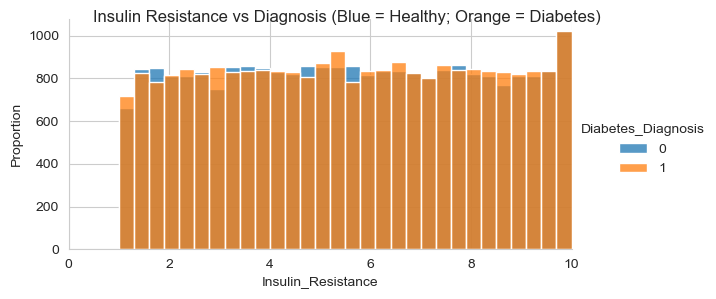

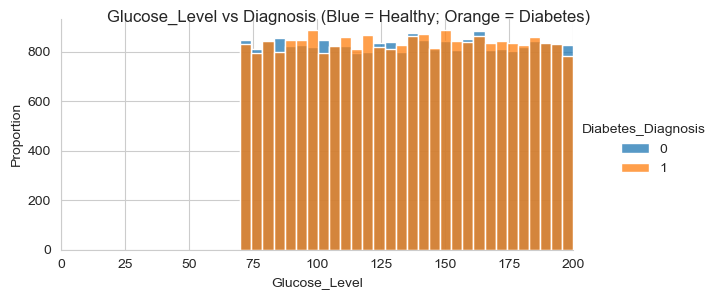

In [36]:
def plotHistogram(values,label,feature,title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label,aspect=2)
    plotOne.map(sns.histplot,feature,kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.show()
plotHistogram(df,"Diabetes_Diagnosis",'Insulin_Resistance','Insulin Resistance vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(df,"Diabetes_Diagnosis",'Glucose_Level','Glucose_Level vs Diagnosis (Blue = Healthy; Orange = Diabetes)')

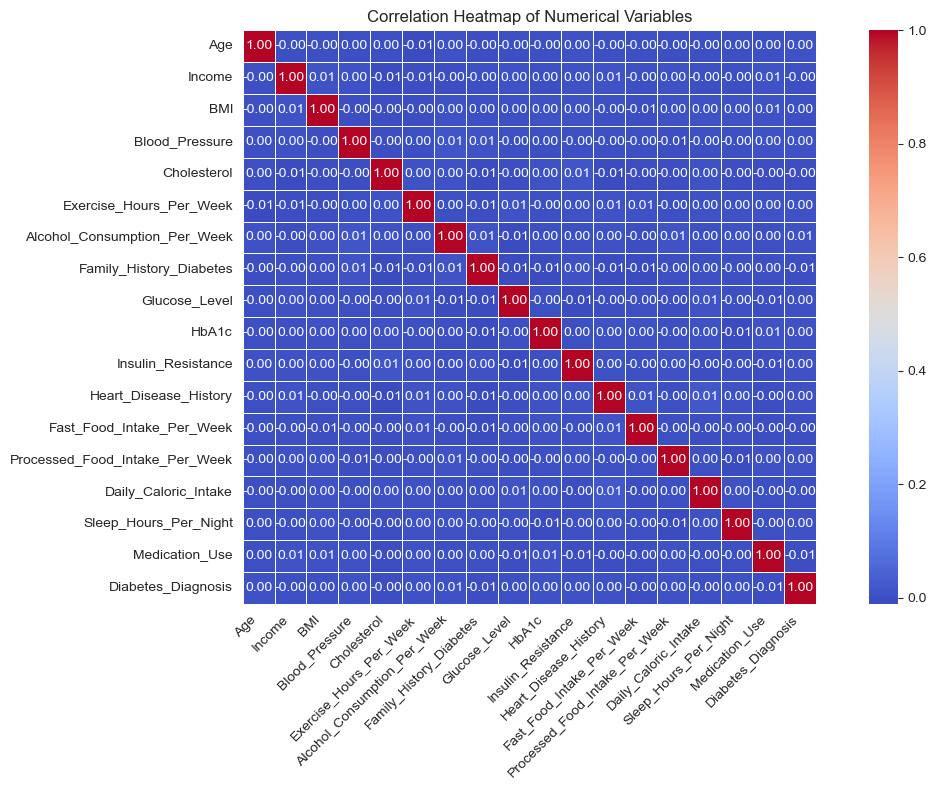


Numeric columns included in correlation analysis:
- Age
- Income
- BMI
- Blood_Pressure
- Cholesterol
- Exercise_Hours_Per_Week
- Alcohol_Consumption_Per_Week
- Family_History_Diabetes
- Glucose_Level
- HbA1c
- Insulin_Resistance
- Heart_Disease_History
- Fast_Food_Intake_Per_Week
- Processed_Food_Intake_Per_Week
- Daily_Caloric_Intake
- Sleep_Hours_Per_Night
- Medication_Use
- Diabetes_Diagnosis


In [37]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f", 
            linewidths=0.5,
            square=True)

plt.title("Correlation Heatmap of Numerical Variables")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Print which columns were included
print("\nNumeric columns included in correlation analysis:")
for col in numeric_df.columns:
    print(f"- {col}")

C:\Users\admin\AppData\Local\Temp\ipykernel_20696\1345875110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diabetes_Diagnosis", y="BMI", data=df, palette="Set2")


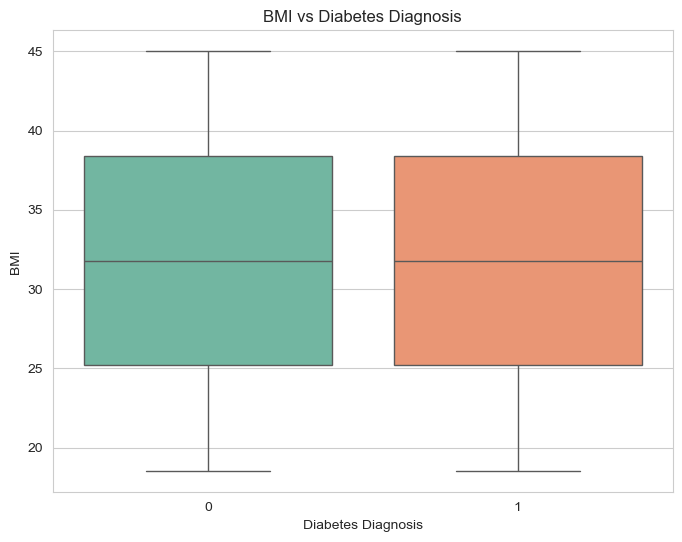

In [38]:
# Boxplot for BMI grouped by Diabetes Diagnosis
plt.figure(figsize=(8,6))
sns.boxplot(x="Diabetes_Diagnosis", y="BMI", data=df, palette="Set2")
plt.title("BMI vs Diabetes Diagnosis")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("BMI")
plt.show()


Top Correlated Features with Diabetes Diagnosis:
Diabetes_Diagnosis                1.000000
Alcohol_Consumption_Per_Week      0.005165
Age                               0.004277
Blood_Pressure                    0.004124
HbA1c                             0.003221
Heart_Disease_History             0.002578
Exercise_Hours_Per_Week           0.002071
Insulin_Resistance                0.001992
Sleep_Hours_Per_Night             0.001676
Processed_Food_Intake_Per_Week    0.001347
Name: Diabetes_Diagnosis, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_20696\3768969463.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=pastel_palette)


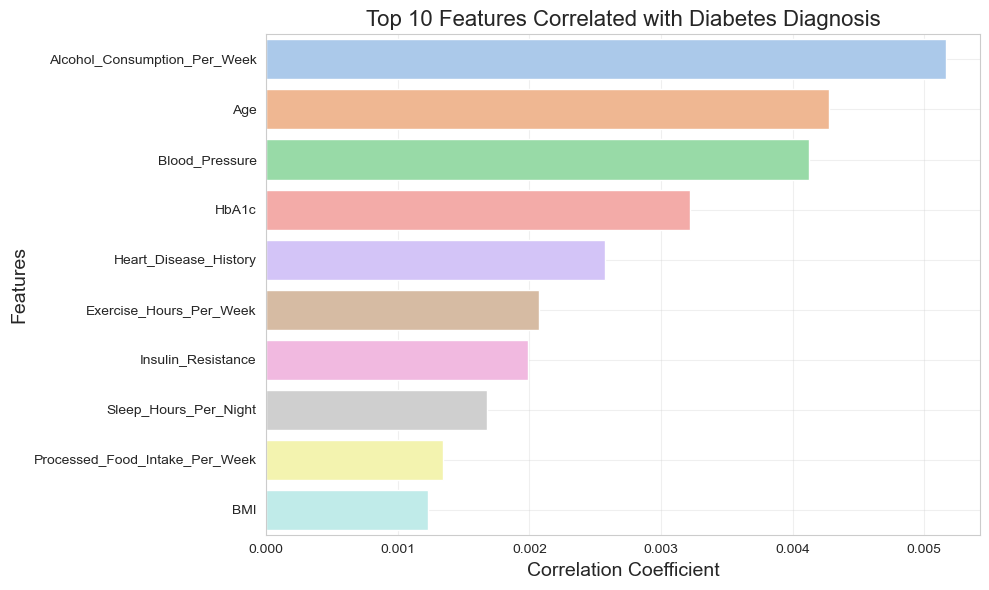


Correlations with absolute values:
Diabetes_Diagnosis                1.000 (Strong)
Alcohol_Consumption_Per_Week        0.005 (Weak)
Age                                 0.004 (Weak)
Blood_Pressure                      0.004 (Weak)
HbA1c                               0.003 (Weak)
Heart_Disease_History               0.003 (Weak)
Exercise_Hours_Per_Week             0.002 (Weak)
Insulin_Resistance                  0.002 (Weak)
Sleep_Hours_Per_Night               0.002 (Weak)
Processed_Food_Intake_Per_Week      0.001 (Weak)
Name: Diabetes_Diagnosis, dtype: object


In [39]:
# First, select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlations with Diabetes_Diagnosis
correlation = numeric_df.corr()["Diabetes_Diagnosis"].sort_values(ascending=False)

print("\nTop Correlated Features with Diabetes Diagnosis:")
print(correlation.head(10))

# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Visualize top correlations with pastel colors
plt.figure(figsize=(10, 6))
top_features = correlation[1:11]  # Excluding Diabetes_Diagnosis itself
sns.barplot(x=top_features.values, y=top_features.index, palette=pastel_palette)
plt.title("Top 10 Features Correlated with Diabetes Diagnosis", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print correlations with their absolute values
print("\nCorrelations with absolute values:")
print(correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.5 else 'Moderate' if abs(x) > 0.3 else 'Weak'})")
      .head(10))

In [40]:
data = df

# Define the feature columns and the target variable
feature_cols = [
    'Age', 'Gender', 'Ethnicity', 'Income', 'BMI', 'Blood_Pressure',
    'Cholesterol', 'Exercise_Hours_Per_Week', 'Alcohol_Consumption_Per_Week',
    'Smoking_Status', 'Family_History_Diabetes', 'Glucose_Level', 'HbA1c',
    'Insulin_Resistance', 'Heart_Disease_History', 'Physical_Activity_Level',
    'Fast_Food_Intake_Per_Week', 'Processed_Food_Intake_Per_Week', 'Daily_Caloric_Intake',
    'Sleep_Hours_Per_Night', 'Stress_Level', 'Medication_Use'
]

# Preprocessing: Convert categorical features into numeric codes
# Update the list below with any features that are categorical in your dataset.
categorical_features = ['Gender', 'Ethnicity', 'Smoking_Status','Stress_Level','Physical_Activity_Level']
                        
target_col = 'Diabetes_Diagnosis'

# <p style="padding:20px;background-color:#012e27;margin:0;color:white;font-family:calibri;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">🐱‍💻 Step 2 | Testing Models</p>



In [41]:
for col in categorical_features:
    if col in data.columns:
        data[col] = data[col].astype('category').cat.codes

# Similarly, if the target is categorical (e.g., 'Yes'/'No'), encode it as well.
if data[target_col].dtype == 'object':
    data[target_col] = data[target_col].astype('category').cat.codes

# Split the data into features (X) and target (y)
X = data[feature_cols]
y = data[target_col]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier with desired hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4943
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.53      0.51      4884
           1       0.51      0.46      0.48      5116

    accuracy                           0.49     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical features
for col in categorical_features:
    if col in data.columns:
        data[col] = data[col].astype('category').cat.codes

# Encode the target variable if categorical
if data[target_col].dtype == 'object':
    data[target_col] = data[target_col].astype('category').cat.codes

# Split the data into features (X) and target (y)
X = data[feature_cols]
y = data[target_col]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingClassifier with desired hyperparameters
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4906
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.53      0.50      4884
           1       0.50      0.46      0.48      5116

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



In [85]:
# Identify categorical columns and encode them
categorical_cols = ['Gender', 'Ethnicity', 'Smoking_Status','Stress_Level','Physical_Activity_Level'
                         ]

# Split features and target
X = df.drop(columns=['Diabetes_Diagnosis'])  # Replace 'target' with actual target column name
y = df['Diabetes_Diagnosis']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))  # SVM with probability enabled
]

# Train base models and generate meta-features
meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))

for i, (name, model) in enumerate(base_models):
     model.fit(X_train, y_train)
     meta_features_train[:, i] = model.predict_proba(X_train)[:, 1]  # Use probabilities for better learning
     meta_features_test[:, i] = model.predict_proba(X_test)[:, 1]

# Train meta-model (Logistic Regression)
meta_model = LogisticRegression()
meta_model.fit(meta_features_train, y_train)

# Predict using the meta-model
meta_predictions = meta_model.predict(meta_features_test)

# Evaluate model
accuracy = accuracy_score(y_test, meta_predictions)
print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")

Stacking Ensemble Accuracy: 0.4996


# <p style="padding:20px;background-color:#012e27;margin:0;color:white;font-family:calibri;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">🐱‍🚀 Step 3 | Horizontal Federated Learning (HFL)</p>

<div style="color:black; 
            padding: 10px; 
            border-radius: 5px; 
            background-color: #213d53; 
            font-size: 130%; 
            font-family: calibri;
            text-align:center;
            letter-spacing: 0.5px;">

     
  <span style="font-size:18px;"><span style="font-weight:800;"><span style="color:white;">  HFL is when multiple clients share the same feature space but have different data samples.

I'll use Flower (FL) for Federated Learning along with TensorFlow/Keras for a model.

Steps:  
1- Load and preprocess the dataset.  
2- Define a model.  
3- Simulate multiple clients training locally.  
4- Use federated aggregation.  </span>
</div>
     

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import copy
import numpy as np
import pandas as pd
from web3 import Web3
import json

In [ ]:
abi_str=""" ABI JSON STRING HERE """

In [ ]:

# ---- Blockchain Setup ----
ganache_url = "http://127.0.0.1:7545"  
web3 = Web3(Web3.HTTPProvider(ganache_url))
w3 = Web3(Web3.HTTPProvider(ganache_url))
assert web3.is_connected(), "Web3 is not connected to Ganache"

# Smart contract details
contract_address = "0xcontractadd :)"  # conttract address apres un deploy
contract_abi = json.loads(abi_str) 
contract = web3.eth.contract(address=contract_address, abi=contract_abi)



In [71]:
# Define the Ethereum addresses for our simulated clients.
# (These should correspond to accounts available in your Ethereum node.)
client_addresses = [
    w3.eth.accounts[1],
    w3.eth.accounts[2],
    w3.eth.accounts[3]
]

def has_signed_consent(client_address):
    """Check blockchain for client's consent."""
    return contract.functions.hasSignedConsent(client_address).call()

def sign_consent(client_address):
    """Sign consent on-chain for a client."""
    tx = contract.functions.signConsent().transact({"from": client_address})
    w3.eth.wait_for_transaction_receipt(tx)
    print(f"Consent signed for client: {client_address}")


In [72]:

#############################
# Automatically Sign Consent for All Clients (if not already signed)
#############################
for i, client_address in enumerate(client_addresses):
    if not has_signed_consent(client_address):
        print(f"Client {i+1} ({client_address}) has NOT signed consent. Signing now...")
        sign_consent(client_address)
    else:
        print(f"Client {i+1} ({client_address}) already signed consent.")


Client 1 (0x082E4Cb0938Ab0Ec38bf7FD7fED83aE27362fA1f) has NOT signed consent. Signing now...
Consent signed for client: 0x082E4Cb0938Ab0Ec38bf7FD7fED83aE27362fA1f
Client 2 (0xaA11A0AA4661a4a14d2b533E646deb96A0fbf68D) has NOT signed consent. Signing now...
Consent signed for client: 0xaA11A0AA4661a4a14d2b533E646deb96A0fbf68D
Client 3 (0xd9646E1BcAF14b2602E453E07Ea2f8DE61f584e1) has NOT signed consent. Signing now...
Consent signed for client: 0xd9646E1BcAF14b2602E453E07Ea2f8DE61f584e1


In [73]:

#############################
# Data Preparation (Horizontal FL)
#############################

# Assume your dataframe is defined as df.
# Also assume 'feature_cols', 'target_col', and 'categorical_features' are defined.
data = df.copy()

# Preprocess categorical features: convert them to numeric codes
for cat in categorical_features:
    data[cat] = pd.Categorical(data[cat]).codes

# Extract features and target from the dataframe
X = data[feature_cols].values.astype(np.float32)
y = data[target_col].values.astype(np.int64)

# Optionally, scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert numpy arrays to torch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

# Create dataset and partition it among clients (each client gets different samples)
dataset = TensorDataset(X_tensor, y_tensor)

def partition_dataset(dataset, num_clients):
    indices = np.random.permutation(len(dataset))
    split_size = len(dataset) // num_clients
    partitions = []
    for i in range(num_clients):
        start = i * split_size
        end = None if i == num_clients - 1 else (i + 1) * split_size
        partitions.append(indices[start:end])
    return partitions

num_clients = len(client_addresses)
client_partitions = partition_dataset(dataset, num_clients)

def create_client_dataloader(dataset, indices, batch_size=32):
    subset = torch.utils.data.Subset(dataset, indices)
    return DataLoader(subset, batch_size=batch_size, shuffle=True)

client_loaders = [create_client_dataloader(dataset, indices) for indices in client_partitions]


In [74]:

#############################
# Model & Training Functions
#############################

# Define a simple neural network for tabular data
class SimpleTabularNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=2):
        super(SimpleTabularNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_dim = len(feature_cols)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [75]:

# Initialize global model
global_model = SimpleTabularNN(input_dim=input_dim).to(device)
global_weights = global_model.state_dict()

def local_train(model, dataloader, epochs=1, lr=0.01, device="cpu"):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(epochs):
        for batch_x, batch_y in dataloader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
    return model.state_dict()

def average_weights(weight_list, client_data_sizes):
    averaged_weights = copy.deepcopy(weight_list[0])
    total_samples = sum(client_data_sizes)
    for key in averaged_weights.keys():
        averaged_weights[key] = sum(
            weight_list[i][key] * (client_data_sizes[i] / total_samples)
            for i in range(len(weight_list))
        )
    return averaged_weights


In [76]:

#############################
# Federated Training Loop with Consent Check
#############################

num_rounds = 20
local_epochs = 20
learning_rate = 0.01

# Record number of samples for each client
client_data_sizes = [len(indices) for indices in client_partitions]

for round_num in range(1, num_rounds + 1):
    print(f"--- Round {round_num} ---")
    local_weights = []
    local_sizes = []  # Only include clients that participated
    
    # Loop over each client
    for i in range(num_clients):
        client_address = client_addresses[i]
        # Check on-chain consent for the client
        if not has_signed_consent(client_address):
            print(f"Client {i+1} ({client_address}) has NOT signed consent. Skipping training for this client.")
            continue

        print(f"Client {i+1} ({client_address}) consent verified. Training begins...")
        local_model = SimpleTabularNN(input_dim=input_dim).to(device)
        local_model.load_state_dict(global_weights)
        updated_weights = local_train(local_model, client_loaders[i], epochs=local_epochs, lr=learning_rate, device=device)
        local_weights.append(updated_weights)
        local_sizes.append(client_data_sizes[i])
    
    # Check if at least one client participated in this round
    if len(local_weights) == 0:
        print("No client participated in this round due to missing consent. Global model not updated.")
    else:
        global_weights = average_weights(local_weights, local_sizes)
        global_model.load_state_dict(global_weights)
        print("Global model updated.")


--- Round 1 ---
Client 1 (0x082E4Cb0938Ab0Ec38bf7FD7fED83aE27362fA1f) consent verified. Training begins...
Client 2 (0xaA11A0AA4661a4a14d2b533E646deb96A0fbf68D) consent verified. Training begins...
Client 3 (0xd9646E1BcAF14b2602E453E07Ea2f8DE61f584e1) consent verified. Training begins...
Global model updated.
--- Round 2 ---
Client 1 (0x082E4Cb0938Ab0Ec38bf7FD7fED83aE27362fA1f) consent verified. Training begins...
Client 2 (0xaA11A0AA4661a4a14d2b533E646deb96A0fbf68D) consent verified. Training begins...
Client 3 (0xd9646E1BcAF14b2602E453E07Ea2f8DE61f584e1) consent verified. Training begins...
Global model updated.
--- Round 3 ---
Client 1 (0x082E4Cb0938Ab0Ec38bf7FD7fED83aE27362fA1f) consent verified. Training begins...
Client 2 (0xaA11A0AA4661a4a14d2b533E646deb96A0fbf68D) consent verified. Training begins...
Client 3 (0xd9646E1BcAF14b2602E453E07Ea2f8DE61f584e1) consent verified. Training begins...
Global model updated.
--- Round 4 ---
Client 1 (0x082E4Cb0938Ab0Ec38bf7FD7fED83aE27362fA1

In [77]:

#############################
# Global Model Evaluation
#############################

global_model.eval()
correct = 0
total = 0
eval_loader = DataLoader(dataset, batch_size=32)
with torch.no_grad():
    for batch_x, batch_y in eval_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        outputs = global_model(batch_x)
        _, predicted = torch.max(outputs, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
print(f"Accuracy on the dataset: {100 * correct / total:.2f}%")


Accuracy on the dataset: 57.18%


# <p style="padding:20px;background-color:#012e27;margin:0;color:white;font-family:calibri;font-size:120%;text-align:center;border-radius: 15px 500px;overflow:hidden;font-weight:800">🐱‍🐉🐱‍👤 Step 3 |  Vertical Federated Learning (VFL) with Feature Matching</p>

<div style="color:black; 
            padding: 10px; 
            border-radius: 5px; 
            background-color: #213d53; 
            font-size: 130%; 
            font-family: calibri;
            text-align:center;
            letter-spacing: 0.5px;">

     
  <span style="font-size:18px;"><span style="font-weight:800;"><span style="color:white;">  In VFL, different parties hold different features of the same data samples. This is common in financial and healthcare data.

Since VFL requires feature alignment across different clients, we simulate two organizations (e.g., one holds text data, another holds metadata).
  </span>
</div>
     

In [78]:
# Assume feature_cols and target_col are defined and df is preprocessed.
num_features = len(feature_cols)
features_A = feature_cols[:num_features // 2]
features_B = feature_cols[num_features // 2:]

# Extract the features and target as numpy arrays.
X = df[feature_cols].values.astype(np.float32)
y = df[target_col].values.astype(np.int64)

# Convert to torch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

# Create a TensorDataset. In vertical FL, both parties share the same sample order.
dataset = TensorDataset(X_tensor, y_tensor)

# Create a DataLoader for training. (Both parties agree on the sample order.)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Split the feature tensor along the feature dimension for each party.
def split_features(x):
    # x has shape [batch_size, num_features]
    num_A = len(features_A)
    x_A = x[:, :num_A]  # Features for Party A
    x_B = x[:, num_A:]  # Features for Party B
    return x_A, x_B



In [79]:

# Define the local model for each party.
class ClientModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, output_dim=32):
        super(ClientModel, self).__init__()
        # You can add more layers if desired.
        self.fc = nn.Linear(input_dim, output_dim)
        self.activation = nn.ReLU()
    
    def forward(self, x):
        return self.activation(self.fc(x))

# Define the server model that takes concatenated embeddings.
class ServerModel(nn.Module):
    def __init__(self, input_dim, num_classes=2):
        super(ServerModel, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)
    
    def forward(self, x):
        return self.fc(x)
    


In [80]:
# Instantiate client models for Party A and Party B.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
client_model_A = ClientModel(input_dim=len(features_A)).to(device)
client_model_B = ClientModel(input_dim=len(features_B)).to(device)

# The server model takes the concatenated embeddings from both clients.
# For example, if each client outputs a 32-dimensional embedding, the server input dim is 64.
server_model = ServerModel(input_dim=32 * 2).to(device)

# Define optimizers for each model
optimizer_A = optim.SGD(client_model_A.parameters(), lr=0.01)
optimizer_B = optim.SGD(client_model_B.parameters(), lr=0.01)
optimizer_server = optim.SGD(server_model.parameters(), lr=0.01)

# Define loss function
criterion = nn.CrossEntropyLoss()
# Training parameters
num_epochs = 50


In [81]:

# Training loop for vertical federated learning simulation
for epoch in range(1, num_epochs + 1):
    client_model_A.train()
    client_model_B.train()
    server_model.train()
    
    running_loss = 0.0
    running_correct = 0
    total_samples = 0
    
    for batch in dataloader:
        x, labels = batch
        x, labels = x.to(device), labels.to(device)
        
        # Split the features for each party
        x_A, x_B = split_features(x)
        
        # Forward pass through each client model
        emb_A = client_model_A(x_A)
        emb_B = client_model_B(x_B)
        
        # Server concatenates the embeddings
        combined_emb = torch.cat([emb_A, emb_B], dim=1)
        
        # Forward pass through the server model to get predictions
        outputs = server_model(combined_emb)
        loss = criterion(outputs, labels)
        
        # Zero gradients for all optimizers
        optimizer_A.zero_grad()
        optimizer_B.zero_grad()
        optimizer_server.zero_grad()
        
        # Backward pass: gradients flow back to both client models and the server model.
        loss.backward()
        
        # Update the models
        optimizer_A.step()
        optimizer_B.step()
        optimizer_server.step()
        
        # Update running loss and accuracy
        running_loss += loss.item() * x.size(0)
        _, predicted = torch.max(outputs, 1)
        running_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    
    epoch_loss = running_loss / total_samples
    epoch_accuracy = running_correct / total_samples
    print(f"Epoch {epoch}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    


Epoch 1/50, Loss: 877993.5350, Accuracy: 0.4971
Epoch 2/50, Loss: 0.6932, Accuracy: 0.4997
Epoch 3/50, Loss: 0.6932, Accuracy: 0.5000
Epoch 4/50, Loss: 0.6932, Accuracy: 0.4978
Epoch 5/50, Loss: 0.6932, Accuracy: 0.5014
Epoch 6/50, Loss: 0.6932, Accuracy: 0.4974
Epoch 7/50, Loss: 0.6932, Accuracy: 0.4991
Epoch 8/50, Loss: 0.6932, Accuracy: 0.4996
Epoch 9/50, Loss: 0.6932, Accuracy: 0.4997
Epoch 10/50, Loss: 0.6932, Accuracy: 0.4974
Epoch 11/50, Loss: 0.6932, Accuracy: 0.5001
Epoch 12/50, Loss: 0.6932, Accuracy: 0.4990
Epoch 13/50, Loss: 0.6931, Accuracy: 0.5031
Epoch 14/50, Loss: 0.6932, Accuracy: 0.4998
Epoch 15/50, Loss: 0.6932, Accuracy: 0.4980
Epoch 16/50, Loss: 0.6932, Accuracy: 0.4999
Epoch 17/50, Loss: 0.6932, Accuracy: 0.4990
Epoch 18/50, Loss: 0.6932, Accuracy: 0.4990
Epoch 19/50, Loss: 0.6932, Accuracy: 0.5004
Epoch 20/50, Loss: 0.6932, Accuracy: 0.5030
Epoch 21/50, Loss: 0.6932, Accuracy: 0.4993
Epoch 22/50, Loss: 0.6932, Accuracy: 0.4985
Epoch 23/50, Loss: 0.6932, Accuracy:

In [82]:
# Evaluation: Compute overall loss and accuracy on the dataset
client_model_A.eval()
client_model_B.eval()
server_model.eval()

total_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for batch in dataloader:
        x, labels = batch
        x, labels = x.to(device), labels.to(device)
        x_A, x_B = split_features(x)
        emb_A = client_model_A(x_A)
        emb_B = client_model_B(x_B)
        combined_emb = torch.cat([emb_A, emb_B], dim=1)
        outputs = server_model(combined_emb)
        loss = criterion(outputs, labels)
        
        total_loss += loss.item() * x.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

overall_loss = total_loss / total
overall_accuracy = correct / total

print(f"\nOverall Loss: {overall_loss:.4f}, Overall Accuracy: {overall_accuracy:.4f}")



Overall Loss: 0.6932, Overall Accuracy: 0.4979


In [83]:

# Example inference on a single batch (or new data)
with torch.no_grad():
    for batch in dataloader:
        x, labels = batch
        x, labels = x.to(device), labels.to(device)
        x_A, x_B = split_features(x)
        emb_A = client_model_A(x_A)
        emb_B = client_model_B(x_B)
        combined_emb = torch.cat([emb_A, emb_B], dim=1)
        outputs = server_model(combined_emb)
        _, predicted = torch.max(outputs, 1)
        print("Predicted:", predicted[:5].cpu().numpy(), "Actual:", labels[:5].cpu().numpy())
        break  # only evaluate on one batch for demonstration

Predicted: [0 0 0 0 0] Actual: [1 1 1 0 1]
